In [13]:
# the usual boilerplate stuff
import numpy as np
import numpy.random as rng
import matplotlib.pyplot as plt
dum = plt.rcParams['text.usetex'] = False  # can use latex in figures
np.set_printoptions(precision=3)

# PART ONE - the idea of a Gaussian process


I'm going to start by simply making up some data. You could do this any way you can think of, but I'm going to make a "random walk". 
Just imagine the $x$-direction is a road, and the $y$ value at $x=0$ is a drunk, who is stumbling down this road. Each step he takes, he staggers a little to the left or right. I'll also give a slight tendency to stay near the middle of the road.

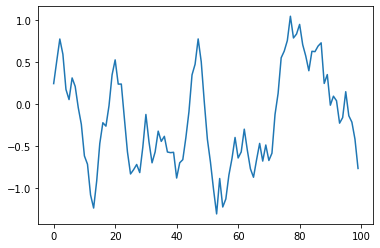

In [14]:
# Going to make a "random walk"!.... and see what its covariance function looks like.
n = 10000 # making it a long stagger, so we get decent statistics
x = []
current=0.0
for i in range(n):
    current += rng.uniform()-0.5  # flat, between -0.5 and 0.5
    current *= 0.9 # fade it back towards zero a bit so it doesn't wander off
    x.append(current)
x = np.array(x)
plt.plot(range(100),x[:100])  # JUST SHOWING THE FIRST FEW ON THE PLOT.

That looks pretty rough, so let's do a little bit of (arbitrary) smoothing...

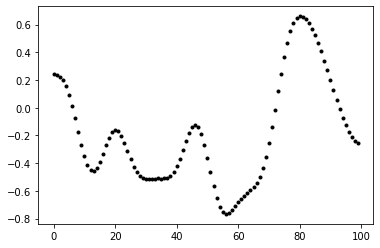

In [15]:
for k in range(25):
    x[1:-2] = (x[:-3] + x[1:-2] + x[2:-1])/3.0
plt.plot(range(100),x[:100],'.k')  # JUST SHOWING THE FIRST FEW ON THE PLOT.

## visualise the pair-wise connection between the y-values pairs measured at a certain distance in x-space


One way to get the covariance for a distance of (say) 4 would be to make lots of sequences as above, and plot (say) $x_0$ vs $x_4$ for each of them.

But instead, I'm going to do the cheaper thing, and just run along that one sequence, looking at $(x_0,x_4)$ and $(x_1,x_5)$ and so on. This isn't quite as good (since these _pairs_ are actually connected to one another, not separate samples) but it should do.  

Actually, let's do this for a few different distances.

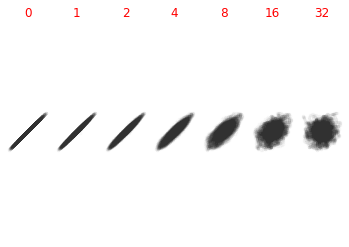

In [16]:
def pairPlots():
    options = [0,1,2,4,8,16,32]
    for p,option in enumerate(options):
        series1 = x[:len(x)-option]
        series2 = x[option:]
        plt.subplot(1,len(options),p+1)
        plt.plot(series1, series2, '.k',alpha=0.02)
        plt.title(option,color='red')
        plt.axis('equal')
        plt.axis('off')

pairPlots()

Sod it, let's do it for all distances : we'll get a curve!

## it's a covariance function!

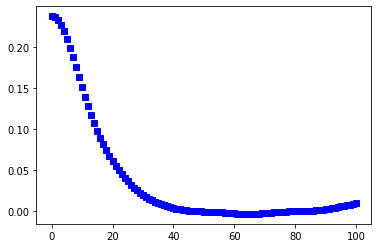

In [17]:
# Covariance in a number at each "range" in the data space.
def calcEmpiricalCov_vs_Dist(x):
    M=101
    dists = []
    cov_fn = []
    mu = np.mean(x)
    for i in range(M):
        series1 = x[:len(x)-i]
        series2 = x[i:]
        assert(len(series1)==len(series2))
        c = np.mean((series1-mu) * (series2-mu)) # this is the covariance, for this "gap"
        cov_fn.append(c)
        dists.append(i)
    return (dists, cov_fn)
#-------------------------------------
dists, cov_at_dist = calcEmpiricalCov_vs_Dist(x)
plt.plot(dists,cov_at_dist,'sb')

### now add some "measurement noise" to our fake data
and make the same two plots, just to see the effect.

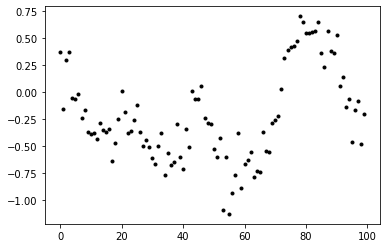

In [18]:
# Add i.i.d. noise to that... and see what its covariance function looks like NOW
stddev = np.sqrt(0.02)
for i in range(len(x)):
    x[i] += stddev*rng.randn()
plt.plot(range(100),x[:100],'.k')  # nb: just showing the  first part of a longer series

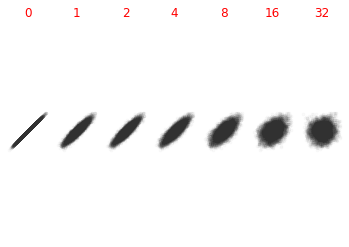

In [19]:
pairPlots()

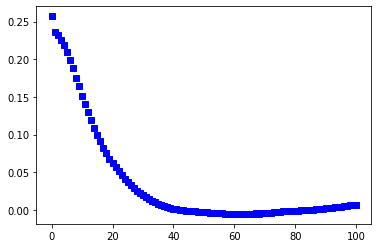

In [20]:
dists, cov_at_dist = calcEmpiricalCov_vs_Dist(x)
plt.plot(dists,cov_at_dist,'sb')

Notice that the only value that moves (much) here is the distance=0 one at the start.

It's not trivial, but do you see why, intuitively? 

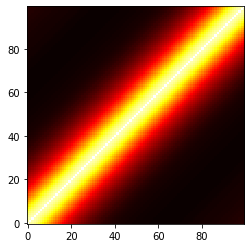

In [21]:
n=100
cov_matrix = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        cov_matrix[i,j] = cov_at_dist[np.abs(i-j)]
plt.imshow(cov_matrix,interpolation='nearest',origin='lower',cmap='hot')

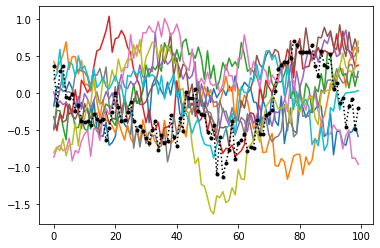

In [22]:
y = rng.multivariate_normal(np.zeros(n),cov_matrix,10)
for i in range(10):
    plt.plot(range(n),y[i])
plt.plot(range(100),x[:100],'.:k')

So! These curves were made by 
 * taking some real (admittedly fake) data
 * finding the covariance between $y$-values, for all the different distances in $x$-space.
 * sampling from a multivariate Gaussian built to mirror exactly those covariances, but knowing nothing else.
 
Do these curves look like they come from the same "family" as the original curve (the black dashed one)? (You tell me).

# If this makes sense

proceed to PART TWO.